In [46]:
import matplotlib.pyplot as plt
import numpy as np
import json

In [47]:
speedup_factor = 100
with open('simlog.json', 'r') as f:
    sim = json.load(f)
with open('maestronetlist.json', 'r') as f:
    netlist = json.load(f)['tasks']

In [13]:
target_order = [n['id'] for n in netlist]
target_timings = [n['start'] for n in netlist]
sim_order = list(sim.keys())
sim_timings = [v*speedup_factor for v in sim.values()]

In [14]:
np.unique([
    t['task'] for t in netlist
])

array(['anneal', 'characterization_to_storage', 'characterize',
       'cooldown', 'hotplate_to_storage', 'spincoat',
       'spincoater_to_hotplate', 'storage_to_characterization',
       'storage_to_spincoater'], dtype='<U27')

In [43]:
def plot_task_types(sim):
    key = {
        'heat/cool':['anneal', 'cooldown'],
        'spincoat':['spincoat'],
        'characterize':['characterize'],
        'transfer':[
            'characterization_to_storage',
            'storage_to_characterization',
            'spincoater_to_hotplate',
            'storage_to_spincoater',
            'hotplate_to_storage',
        ]
    }
    colors = {k:plt.cm.Set2(i) for i,k in enumerate(key)}
    yvals = {k:i for i,k in enumerate(key)}

    for task, time in sim.items():
        for k,v in key.items():
            if task.split('-')[0] in v:
                plt.scatter(time*speedup_factor, yvals[k], color=colors[k])
                break
    plt.yticks(range(len(key)), key.keys())



In [45]:
{t:ti for t,ti in sim.items() if t.split('-')[0] == 'spincoat'}

{'spincoat-a9828248-d0d9-4a42-85d7-178b5ebdd257': 1.1101179122924805,
 'spincoat-5b7ea12c-97e9-40df-9b06-09e0161cecea': 4.802550792694092,
 'spincoat-296a5289-a885-4214-a968-34f104fb29ce': 8.48573923110962,
 'spincoat-0d8f3520-0636-467d-bd68-e8107d3d4605': 10.97991418838501,
 'spincoat-d2ca30e0-3358-4f67-8a1b-05de4664901a': 13.46450400352478,
 'spincoat-138f5c9f-8cb0-415a-8d9f-685bd2c76a25': 14.746378183364868,
 'spincoat-655a4705-48eb-472f-8d06-7bc52d462d63': 16.035661935806274,
 'spincoat-93b52787-0a84-44d8-ba96-d2bee7b1478c': 19.7239351272583,
 'spincoat-c2500b3a-335f-485c-8365-8f534fdba17a': 23.415459871292114,
 'spincoat-e0f293be-fce8-4fb7-ad28-1bd3f1d559b8': 25.898453950881958,
 'spincoat-19036bb3-3d3b-42cc-8d82-1a080d80cd6c': 28.38879084587097,
 'spincoat-8cf8ef47-5434-4154-a5b2-782b178bf64b': 29.676740884780884,
 'spincoat-4ad546e8-75d0-49a1-b04c-251655b64579': 30.96564483642578,
 'spincoat-0d2143f6-7b6d-4be9-b1cb-3b837fabf07c': 35.031352043151855,
 'spincoat-d46f8c3e-5d4f-47dc

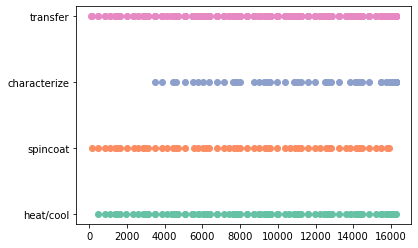

In [44]:
plot_task_types(sim)

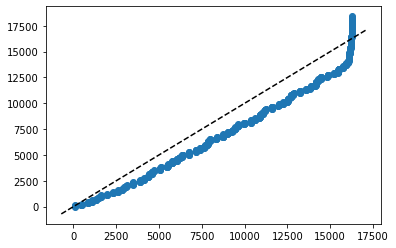

In [16]:
fig, ax = plt.
plt.scatter(sim_timings, target_timings)
plt.plot(plt.xlim(), plt.xlim(), 'k--')

In [14]:
sim_order == target_order

True

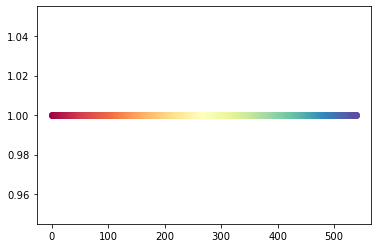

In [6]:
for i, t in enumerate(sim):
    color = plt.cm.Spectral(target_order.index(t)/len(target_order))
    plt.scatter(i, 1, c=[color])

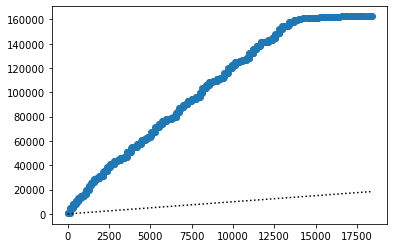

In [66]:
plt.scatter(goal_starts, actual_starts, alpha=)
plt.plot([min(goal_starts), max(goal_starts)], [min(goal_starts), max(goal_starts)], 'k:')

Plot simulated process order

In [56]:
worker_tasks = {
    'gripper_gantry': [
        'storage_to_spincoater',
        'spincoater_to_hotplate',
        'hotplate_to_storage',
        'storage_to_characterization',
        'characterization_to_storage',
    ],
    'spincoater_liquidhandler': [
        'storage_to_spincoater',
        'spincoater_to_hotplate',
        'spincoat',
    ],
    'hotplate': [
        'anneal',
    ],
    'storage': [
        'cooldown',
    ],
    'characterization': [
        'characterize',
        'storage_to_characterization',
        'characterization_to_storage',
    ]
}

In [51]:
sim['sample0']['tasks'][0]

{'details': '',
 'id': 'storage_to_spincoater-247a68e4-5595-45a6-ba13-5884d883b296',
 'precedents': [],
 'sample': 'sample0',
 'start': 0,
 'task': 'storage_to_spincoater',
 'start_actual': 1.0439341068267822,
 'finish_actual': 1.045309066772461}

In [66]:
def plot_solution(sim, ax=None):
    plt.figure(figsize=(14, 5))
    for idx, (sample, data) in enumerate(sim.items()):
        color = plt.cm.tab20(idx % 20)
        offset = np.random.random() * 0.5 - 0.25
        for t in data['tasks']:
            for i, (w, tl) in enumerate(worker_tasks.items()):
                found = False
                if t['task'] in tl:
                    y = [i + offset] * 2

                    st = t['start_actual']*speedup_factor / 60
                    ft = t['finish_actual']*speedup_factor / 60

                    minval = 0.5
                    if ft-st < minval:
                        ft = st+minval
                    x = [st,ft]
                    plt.plot(x, y, color=color)
                    found = True
                    break
            if not found:
                print(t['task'])

    plt.yticks(range(len(worker_tasks)), labels=worker_tasks.keys())
    plt.xlabel("Time (minutes)")

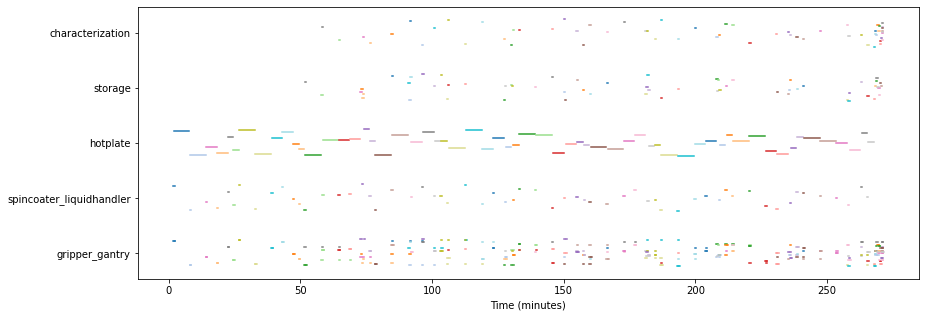

In [67]:
plot_solution(sim)